<a href="https://colab.research.google.com/github/asin977/DATASCIENCE-ASSIGNMENT/blob/main/Assignment_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/titanic_dataset.csv')
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                  

2. Make ‘PassengerId’ as the index column

In [ ]:

df.set_index('PassengerId', inplace=True)
print(df.head())


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

3. Check the basic details of the dataset

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


4. Fill in all the missing values present in all the columns in the dataset

In [ ]:
print(df.isnull().sum())



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


5. Check and handle outliers in at least 3 columns in the dataset

Column: Age
Number of outliers: 11
Lower Bound: -6.6875, Upper Bound: 64.8125

Column: Fare
Number of outliers: 116
Lower Bound: -26.724, Upper Bound: 65.6344

Column: SibSp
Number of outliers: 46
Lower Bound: -1.5, Upper Bound: 2.5



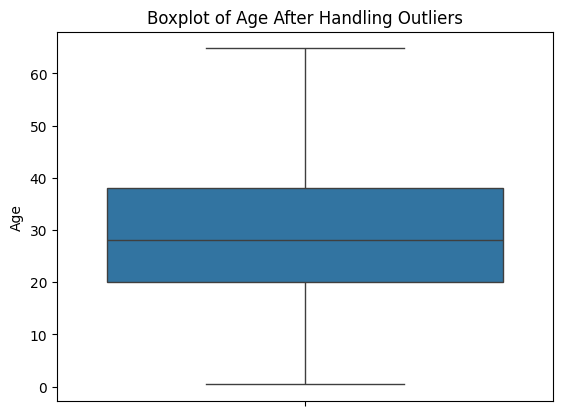

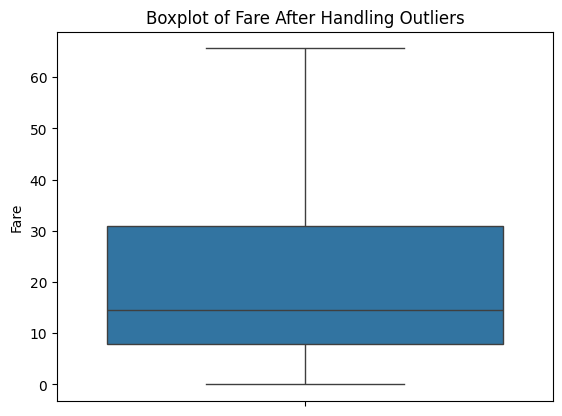

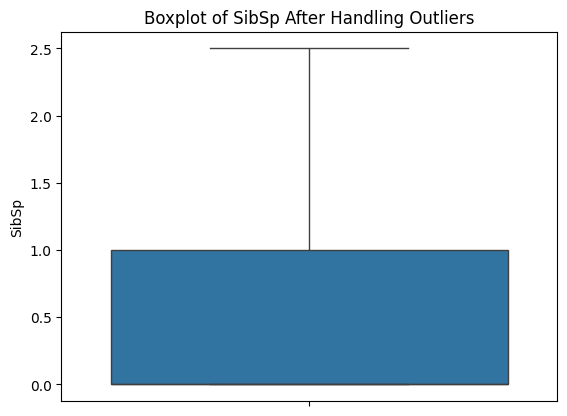

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['Age', 'Fare', 'SibSp']

for col in columns_to_check:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")


    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


for col in columns_to_check:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} After Handling Outliers')
    plt.show()


6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler





X = df.drop(columns=['Survived'])
y = df['Survived']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))
X_scaled_df = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=['float64', 'int64']).columns, index=X.index)
X_final = pd.concat([X_scaled_df, X.select_dtypes(include=['object'])], axis=1)
print(X_final.head())


             Pclass       Age  SibSp  Parch      Fare  \
PassengerId                                             
1               1.0  0.335132    0.4    0.0  0.110460   
2               0.0  0.583608    0.4    0.0  1.000000   
3               1.0  0.397251    0.0    0.0  0.120745   
4               0.0  0.537019    0.4    0.0  0.809027   
5               1.0  0.537019    0.0    0.0  0.122649   

                                                          Name     Sex  \
PassengerId                                                              
1                                      Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                                       Heikkinen, Miss. Laina  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                     Allen, Mr. William Henry    male   

                       Ticket Cabin Embarked  
PassengerId                       